# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [230]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [232]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [234]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [236]:
# Create a Beautiful Soup Object
html = browser.html

soup = BeautifulSoup(html, 'html.parser')

In [237]:
# Extract all rows of data
table_elements = soup.find_all("tr")
table_elements[0:2]

[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [317]:
# Extract the header row
header_row = table_elements[0]
headers = [th.get_text(strip=True) for th in header_row.find_all("th")]

# Extract the remaining rows
data_rows = table_elements[1:]
data = [[td.get_text(strip=True) for td in row.find_all("td")] for row in data_rows]

# Create the DataFrame
mars_df = pd.DataFrame(data, columns=headers)
mars_df.head(20)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


### Suggested way in assignment

In [242]:
# Create an empty list 
mars_data=[]

# Loop through the scraped data to create a list of rows
for row in table_elements:
    cell_values = row.find_all("td")
    values = []
    for value in cell_values:
        values.append(value.text)
    mars_data.append(values)

mars_data[0:5]

[[],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']]

In [246]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_data_df = pd.DataFrame(mars_data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])


In [248]:
# Confirm DataFrame was created successfully
mars_data_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [253]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [255]:
# Change data types for data analysis

mars_df["id"]= pd.to_numeric(mars_df["id"])
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])
mars_df["sol"] = pd.to_numeric(mars_df["sol"])
mars_df["ls"] = pd.to_numeric(mars_df["ls"])
mars_df["month"] = pd.to_numeric(mars_df["month"])
mars_df["min_temp"] = pd.to_numeric(mars_df["min_temp"])
mars_df["pressure"] = pd.to_numeric(mars_df["pressure"])

In [257]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [260]:
# 1. How many months are there on Mars?
mars_df['month'].max()

12

In [262]:
# 2. How many sols (Martian days) worth of data are there?
martin_days= len(mars_df["sol"])
martin_days

1867

In [264]:
# 3. What is the average minimum temperature by month?
min_temp = mars_df["min_temp"].groupby(mars_df['month']).mean()
min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0.5, 1.0, 'Average Minimum Temperature by Month')

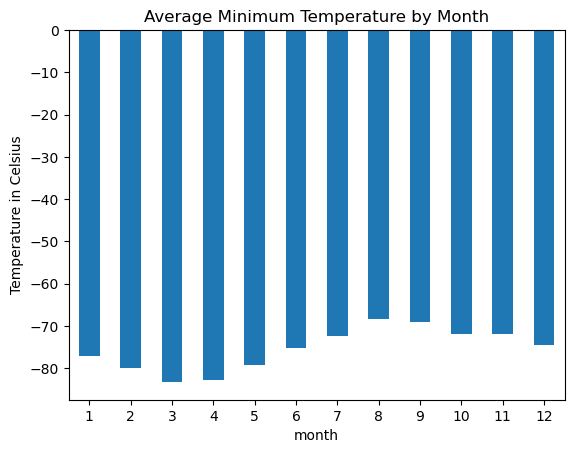

In [266]:
# Plot the average minimum temperature by month
min_temp.plot.bar(rot = 0)
plt.ylabel("Temperature in Celsius")
plt.xlabel("month")
plt.title("Average Minimum Temperature by Month")

Text(0.5, 1.0, 'Average Minimum Temperature by Month')

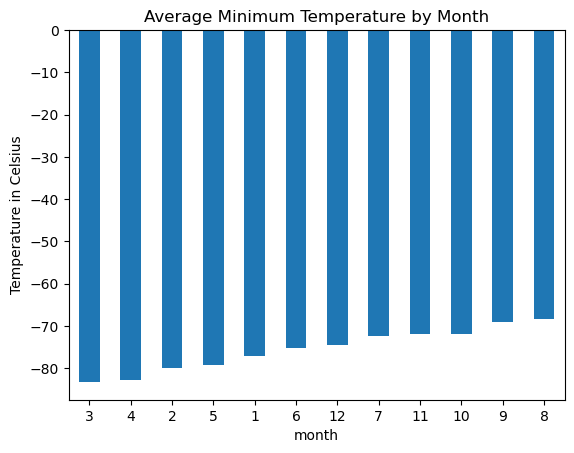

In [268]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
coldest_hottest_month = min_temp.sort_values()
coldest_hottest_month.plot.bar(rot = 0)
plt.ylabel("Temperature in Celsius")
plt.xlabel("month")
plt.title("Average Minimum Temperature by Month")


In [270]:
# 4. What is the average pressure by month?
avg_pressure = mars_df["pressure"].groupby(mars_df['month']).mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0.5, 1.0, 'Average Pressure by Month')

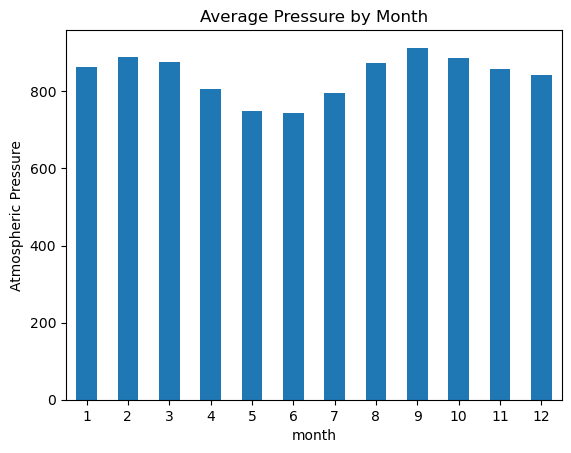

In [272]:
# Plot the average pressure by month
avg_pressure.plot.bar(rot = 0)
plt.ylabel("Atmospheric Pressure")
plt.xlabel("month")
plt.title("Average Pressure by Month")

Text(0.5, 1.0, 'Average Pressure by Month')

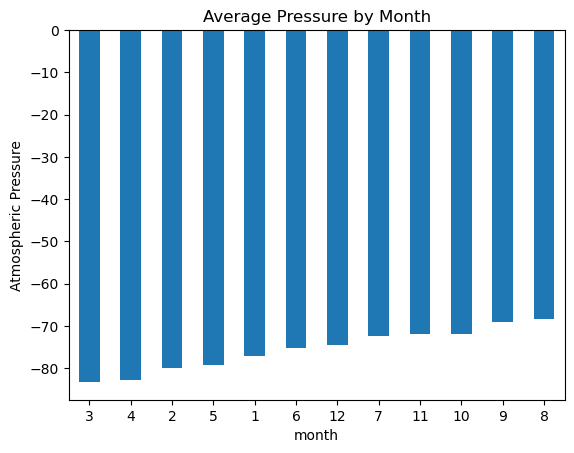

In [274]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
highest_lowest_pressure = min_temp.sort_values()
highest_lowest_pressure.plot.bar(rot = 0)
plt.ylabel("Atmospheric Pressure")
plt.xlabel("month")
plt.title("Average Pressure by Month")

In [276]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
terresterial_days= len(mars_df["terrestrial_date"])
terresterial_days

1867

In [278]:
# Sort the DataFrame by date
mars_df = mars_df.sort_values(by='terrestrial_date')

# Create a new column to count the days starting from 1
mars_df['Terresterial_day_count'] = range(1, len(mars_df) + 1)

# Display the updated DataFrame
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure,Terresterial_day_count
0,2,2012-08-16,10,155,6,-75.0,739.0,1
1,13,2012-08-17,11,156,6,-76.0,740.0,2
2,24,2012-08-18,12,156,6,-76.0,741.0,3
3,35,2012-08-19,13,157,6,-74.0,732.0,4
4,46,2012-08-20,14,157,6,-74.0,740.0,5
...,...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0,1863
1863,1892,2018-02-24,1974,134,5,-77.0,729.0,1864
1864,1894,2018-02-25,1975,134,5,-76.0,729.0,1865
1865,1893,2018-02-26,1976,135,5,-77.0,728.0,1866


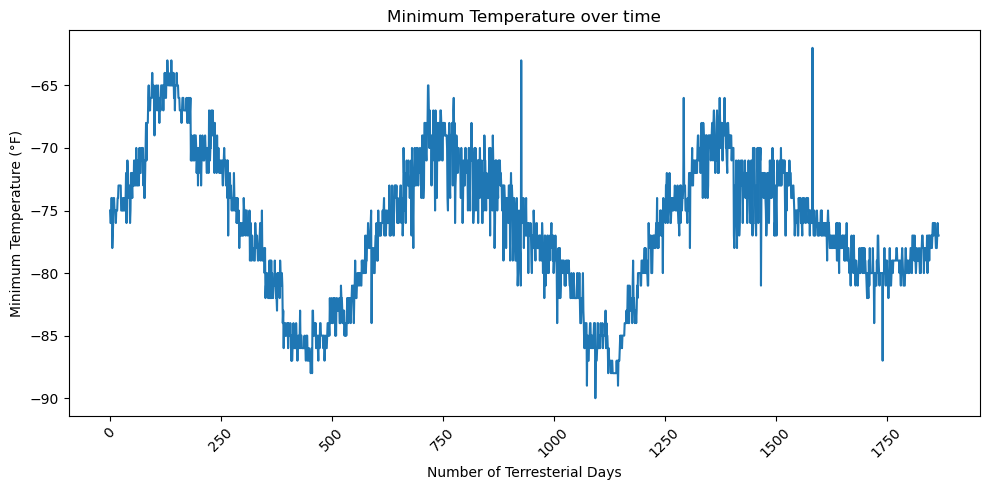

In [294]:
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

plt.figure(figsize=(10, 5))
plt.plot(mars_df['Terresterial_day_count'], mars_df['min_temp'], linestyle='-')
plt.xlabel('Number of Terresterial Days')
plt.ylabel('Minimum Temperature (°F)')
plt.title('Minimum Temperature over time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### Minimum Temperature

YOUR ANALYSIS HERE

In [305]:
min_temp = mars_df["min_temp"].min()
min_temp

-90.0

#### Atmospheric Pressure

Atmospheric pressure is, on average, lowest in the month-8 and highest in the month-3.

#### Year Length

YOUR ANALYSIS HERE

In [307]:
max_date = mars_df["terrestrial_date"].max()
max_date

Timestamp('2018-02-27 00:00:00')

In [309]:
min_date = mars_df["terrestrial_date"].min()
min_date

Timestamp('2012-08-16 00:00:00')

In [311]:
timestamp1 = pd.Timestamp('2018-02-27 00:00:00')
timestamp2 = pd.Timestamp('2012-08-16 00:00:00')

# Calculate the difference in days
difference_in_days = (timestamp1 - timestamp2).days

print(f"The number of days between {timestamp1} and {timestamp2} is {difference_in_days} days.")

The number of days between 2018-02-27 00:00:00 and 2012-08-16 00:00:00 is 2021 days.


In [319]:
# Total number of sol days
last_day_sol=mars_df['sol'].max()
last_day_sol

'998'

In [331]:
last_day_sol = int(last_day_sol)

In [337]:
# Difference in Mars vs Earth
days_per_year = difference_in_days/last_day_sol
days_per_year

2.0250501002004007

In [339]:
# Year lenght in Mars 

year_lenght_mars = 365*days_per_year
year_lenght_mars

739.1432865731463

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [298]:
# Write the data to a CSV
mars_df.to_csv("mars_df.csv")

In [300]:
browser.quit()